In [120]:
### Running in Google Colab? You'll want to uncomment and run these cell once each time you start this notebook.

"""
!pip uninstall cftime --yes
!pip install cftime==1.2.1
!pip install nc-time-axis
!pip install netcdf4
!wget https://github.com/psheehan/CIERA-HS-Program/blob/master/Projects/EarthsClimateModel/tas_Amon_CESM1-WACCM_rcp85_r2i1p1_200601-209912.nc?raw=true
!mv tas_Amon_CESM1-WACCM_rcp85_r2i1p1_200601-209912.nc?raw=true tas_Amon_CESM1-WACCM_rcp85_r2i1p1_200601-209912.nc
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip uninstall shapely cartopy --yes
!pip install shapely cartopy --no-binary shapely --no-binary cartopy

Uninstalling cftime-1.2.1:
  Successfully uninstalled cftime-1.2.1
  Using cached https://files.pythonhosted.org/packages/5f/b5/4889b4129c5dae6fe203211e435e77e5f6cd893e5f1aa75bbbe204a848b7/cftime-1.2.1-cp37-cp37m-manylinux1_x86_64.whl


--2021-06-03 17:20:56--  https://github.com/psheehan/CIERA-HS-Program/blob/master/Projects/ClimateModel/tas_Amon_CESM1-WACCM_rcp85_r2i1p1_200601-209912.nc?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/psheehan/CIERA-HS-Program/raw/master/Projects/ClimateModel/tas_Amon_CESM1-WACCM_rcp85_r2i1p1_200601-209912.nc [following]
--2021-06-03 17:20:57--  https://github.com/psheehan/CIERA-HS-Program/raw/master/Projects/ClimateModel/tas_Amon_CESM1-WACCM_rcp85_r2i1p1_200601-209912.nc
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/ClimateModel/tas_Amon_CESM1-WACCM_rcp85_r2i1p1_200601-209912.nc [following]
--2021-06-03 17:20:57--  https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/C

# _Welcome to Earth_



## In this module, we'll take the space exploration a little bit closer to home: Earth. 



![2015_epic_earthmoonstill.jpg](attachment:2015_epic_earthmoonstill.jpg)

image from NASA (https://explorer1.jpl.nasa.gov/galleries/earth-from-space/#gallery-16)

# What makes the Earth unique?


The easiest answer? Us. 

Humankind has perfectly evolved to thrive in this climate. Arguably, the main components that support this life is the atmospheric composition and the temperatures we experience because of it.


# Atmospheric Composition


The Earth has this unique atmosphere that allows for life to thrive. The air we breathe is made up of many elements, mainly: nitrogen (78.09%) and oxygen (20.95%). The remaining >1% of the atmosphere is made up of other trace gases like carbon dioxide ($CO_2$), methane ($CH_4$), and water vapor ($H_2O_v$). 

You've probably heard of these molecules before -- water, $CO_2$, and $CH_4$ are famous greenhouse gases. Though you've probably heard of greenhouse gases, the definition is:

**Greenhouse gas:** A gas that absorbs infared energy thus trapping heat.

These greenhouse gases are actually necessary for life -- without these gases trapping heat in our atmosphere, we'd experience immensely cooler temperatures. This can be explained with some basic physics principles.

1. Above 0 Kelvin (or absolute zero), molecules in an object are moving. Therefore, all objects above 0 Kelvin emit radiation. This includes the Sun and the Earth!


2. The radiation ($E$) an object gives off is proportional to its absolute temperature ($T$), as described in the Stefan-Boltzman Law:
    $$E = \sigma T^4 $$ where $\sigma$ is a constant such that: $\sigma = 5.67*10^{-8} W/m^2$.
    If an object completely absorbs and emits radiation, it's what we call a **black body.**


3. The relationship between the object's temperature ($T$) and wavelength ($\lambda$) is called Wien's Law:
    $$ \lambda = c/T $$
    where $c$ is a constant such that: $c = 2897 \mu m * K$. The wavelength an object emits is what we percieve as the color of the object. The sun emits at a high temperature, so we see the the incoming light in the visible spectrum -- the sun glows yellow, so let's say it's emitting at 570 $nm$. The Earth emits radiation at a lower temperature in the infrared (50 $\mu m$), so we can't actually see the outgoing radiation. 
    

After rearranging the Stefan-Boltzmann law, we can rearrange the equation to relate stars and black body planets temperatures to: 

$$ T_{planet} = T_{star} * \sqrt { R_{sun}/{(2*a_{star-planet}) }}$$


With the sun radius of 696,340 km ($696*10^6 m$) and a = 149,598,000 km ($149*10^9 m)$
    

**Question 1: what is the temperature of the Sun's surface? What is the temperature of the Earth's surface?** 

Hint: rearrange Stefan-Boltzman and Wien's law with the information you know about the sun and Earth's peak spectra

Hint 2: If you're still struggling -- Google stefan-boltzmann surface temperature of the sun! (My advice for all problems you can't figure out) 

In [121]:
lambda_sun = 570. / 1000 # nm => microns

T_sun = 2897. / lambda_sun

print("T_sun = ", T_sun)

T_earth = T_sun * (696.0e6 / (2*149.0e9))**0.5

print("T_earth = ", T_earth)

T_sun =  5082.456140350878
T_earth =  245.62361976891697


**Question 2: Look up the average temperature of the Earth's surface. Do your answers match? Why or why not?**

In [122]:
# No; greenhouse effect!

So....


These were leading questions obvioulsy to make you think about the power of that >1% atmosphere. Greenhouse gases are essential to making these temperatures habitable on Earth! What you just solved for was the 1-dimensional average temperature of the Earth if we did not have an atmosphere. But we do ... so it gets more complicated. 


![1965_TIROS9_NOAA_lib.jpeg](attachment:1965_TIROS9_NOAA_lib.jpeg)

image from NASA (https://explorer1.jpl.nasa.gov/galleries/earth-from-space/#gallery-6)

# One-dimensional to three

The previous exercise gave you a 1-D view of the Earth. But we know that the Earth is a sphere which causes all sorts of fun problems, like the uneven distribution of sunlight as compared to the equators and the north pole. 

![latitude_and_sunlight_large.jpg](attachment:latitude_and_sunlight_large.jpg)

From: http://www.geo.mtu.edu/KeweenawGeoheritage/Lake/Temperature_files/latitude_and_sunlight_large.jpg

Solar warming is generally greater at the equator where the sun shines directly and much less at the poles where the sun is low in the sky.  Surfaces that are perpendicular to the sun’s ray path heat faster than those at an angle.  This differential heating is passed on to the air above by conduction which causes air expansion and changes in pressure. Wind is the result of pressure changes in the atmosphere.  Any shoreline is a wind machine, because of solar heating effects.

**Question 3: Using your background knowledge, how would you describe the weather at the equator? (More than just temperatures ...)** 

This differing temperature thus forces air parcels to move, and then the Earth's rotation creates a deflection on these parcels, giving us atmospheric circulation patterns. 

The basic principle comes from the ideal gas law:
$$ PV = nRT $$
Where P = Pressure (atm), V = volume (liters), n = number moles of gas, T = temperature of gas (Kelvin), R = constant, 0.0821 L * atm * K^-1 * mol^-1

![GeneralCirculation.jpg](attachment:GeneralCirculation.jpg)

From: https://history.aip.org/climate/xGenCirc.htm


**Here is a video explainer of this figure if you do not understand the figure, the last 2 minutes are particularly useful for the next two questions:**


https://www.youtube.com/watch?v=ebjKyoQ6YoE

**Question 4: Looking at the figure above, how does the atmospheric circulation converge at the equator (0 degrees)? Think about where the air is going ... what it's bringing ...** 


**Question 5: How about at 30 degrees? Looking at a map, what significant features are found on the 30th latitude? (Hint look to Africa....) Can you explain why this may be happening, given what you know about the way the ideal gas law works and the atmospheric circulation patterns?** 

Unfortunately this perfect circulation model does not work across the entire planet -- think about the temperature of Ireland and Canada -- they're found on the same latitude, but one is so much warmer than the other!

Looking at the Earth as a simple cell does not perfectly explain our climate situation -- it would if we were an Aquaplanet without land (orthographic) scale features and a uniform depth in the ocean -- but obviously, our planet is way more complicated than that. And that's why we can't just use the Stefan-Boltzmann and ideal gas law to explain our climate! They are very useful and provide a part of the story about our climate, however, our mathematical models need to integrate the nuance of oceanic circulation, orthographic features, and clouds! As a result, we go look at far more complicated models -- climate models -- in order to better estimate what's happening in our environment.

# Intro to Climate Models

To reiterate, the energy on Earth comes from the sun, so incoming light -- or radiation, as I'll call it for the rest of this -- is key to controlling temperature. The ultimate amount of warming potential found in the earth is controlled by three knobs:

> 1. Incoming radiation: Amount of sunlight reaching Earth -- influenced by sun spots, the distance of the sun to the Earth
 
> 2. Albedo: Amount of reflectivity on Earth's surface -- what kind of landcover is on the planet

> 3. Gases that absorb longwave radiation: levels of greenhouse gas concentrations in the atmosphere  trap heat

If you change any of these three knobs, you change the climate because you change the radiation balance that we're in!


Climate models use this radiation balance to solve the energy balance, but there's also a mass balance that it must solve. This is stolved through the Navier-Stokes equation ... and it's not pretty.

\begin{equation}
\frac{\partial (\rho u_{i})}{\partial t} + \frac{\partial[\rho u_{i}u_{j}]}{\partial x_{j}} = -\frac{\partial p}{\partial x_{i}} + \frac{\partial \tau_{ij}}{\partial x_{j}} + \rho f_{i} \end{equation}

Basically, we're balancing the flow of fluid motion and balancing the speed, pressure, temperature and density of the gases in the atmosphere and the water in the ocean.

BUT DON'T WORRY -- I'm not having you solve for this equation. I have model data which has already done this for you! A climate model simultaneously solves for the energy and mass balance over a sphere, giving us an incredible tool to study the atmosphere and climate.



## Making Plots with Climate Model Output

For this assignment, you are tasked with creating a Python plot of Climate Model Intercomparison Project CMIP data. CMIP is a standard experimental framework for studying the output of coupled atmosphere-ocean general circulation models. This facilitates assessment of the strengths and weaknesses of climate models which can enhance and focus the development of future models. For example, if the models indicate a wide range of values either regionally or globally, then scientists may be able to determine the cause(s) of this uncertainty.

## Task:  Your assignment is to plot the average global temperature in the year 2066 using whatver map projection you'd like to use.

The CMIP file is called: tas_Amon_CESM1-WACCM_rcp85_r2i1p1_200601-209912.nc

Recommended libraries: xarray, netCDF4, cartopy, matplotlib.pyplot, numpy, pandas 

In [123]:
# Import libraries
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import nc_time_axis
import math
import numpy as np

from netCDF4 import Dataset

1. Read in the file using xarray

In [124]:
file_in = "tas_Amon_CESM1-WACCM_rcp85_r2i1p1_200601-209912.nc"

DS_netcdf = Dataset(file_in)
DS=xr.open_dataset(file_in)

I guess we should talk about Xarray before we continue. Climate data file formats are typically netCDF files, a binary file format that makes these huge datasets more portable across different machines but not possible to open with something like excel. Really, the data are stored in a folder...  Xarray is a great tool to open these files up. But it takes a second to get used to this kinda format. 

In [125]:
print(DS)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 144, time: 1128)
Coordinates:
  * time       (time) object 2006-01-16 12:00:00 ... 2099-12-16 12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/36)
    institution:                  NSF/DOE NCAR (National Center for Atmospher...
    institute_id:                 NSF-DOE-NCAR
    experiment_id:                rcp85
    source:                       CESM1-WACCM
    model_id:                     CESM1-WACCM
    forcing:                      Sl GHG SS Ds SA BC MD OC Oz AA
    ...                           ...
    table_id:                     Table Amon (12 January 2012)

Ok so attributes are not necessary for you all to know, but it's basically the metadata attached to the file! Most important part of the file is the data variables. **tas** is the variable we're more interested in -- it's temperature!

2. Select the 2066 time slice from the array

In [126]:
startday= "2066-01-01"
endday= "2066-12-31"
feb66=DS.sel(time=slice(startday,endday))

feb66

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 144, time: 12)
Coordinates:
  * time       (time) object 2066-01-16 12:00:00 ... 2066-12-16 12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/36)
    institution:                  NSF/DOE NCAR (National Center for Atmospher...
    institute_id:                 NSF-DOE-NCAR
    experiment_id:                rcp85
    source:                       CESM1-WACCM
    model_id:                     CESM1-WACCM
    forcing:                      Sl GHG SS Ds SA BC MD OC Oz AA
    ...                           ...
    table_id:                     Table Amon (12 January 2012) 4996d487f7a657...
    title:                        CESM1-WACCM model output prepared for CMIP5...
    parent_experiment:            historical
    modeling_realm:               atmos
    realization:                  2
    cmor_version:                 2.8.1

3. Average the data over time! (http://xarray.pydata.org/en/stable/generated/xarray.Dataset.mean.html) 

In [127]:
feb66_avg=feb66.mean(dim="time") #complete
print(feb66_avg)

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 96, lon: 144)
Coordinates:
  * lat       (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon       (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height    float64 2.0
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 -90.0 -89.05 -89.05 ... 89.05 89.05 90.0
    lon_bnds  (lon, bnds) float64 -1.25 1.25 1.25 3.75 ... 356.2 356.2 358.8
    tas       (lat, lon) float32 232.0 232.0 232.0 232.0 ... 256.9 256.9 256.9


4. Now let's map it to make more sense of it...

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/geoaxes.py:1586: UserWarning: The following kwargs were not used by contour: 'cbar_kwargs'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


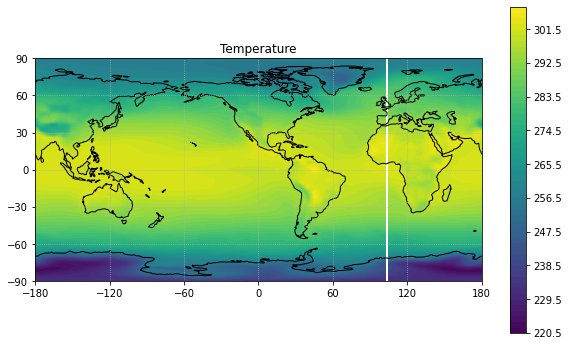

In [128]:
#Projection for plot
projection= ccrs.PlateCarree(central_longitude=255);
# Data projection
data_crs = ccrs.PlateCarree()

# Open figure object
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

# Make a contour plot
lon=feb66_avg["lon"]
lat=feb66_avg["lat"]
data= feb66_avg["tas"]
cf=ax.contourf(lon, lat, data, levels=60, transform=data_crs, cbar_kwargs={'label': DS.tas.units})
plt.colorbar(cf)
ax.set_label(DS.tas.units)

# Add the gridlines, title, colorbar
ax.set_xticks([-180,-120,-60,0, 60, 120, 180], crs= projection)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs= projection)
ax.gridlines(crs=projection,linestyle="dotted")
plt.title("Temperature")

#Save our figure, show our figure! (Must save before showing)
plt.savefig('assignment1_feb66.png')
plt.show()

5. So there you have it! Your first climate plot. Look at your plot and ponder, what is happening in the world? Where is it warm? Where is it cool? Is this expected? 

# Taking off the training wheels! Make your own plots now.

Now that you know how to make a plot, now I want to see:

(a) A map of average temperature from 2006-2016

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/geoaxes.py:1586: UserWarning: The following kwargs were not used by contour: 'cbar_kwargs'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


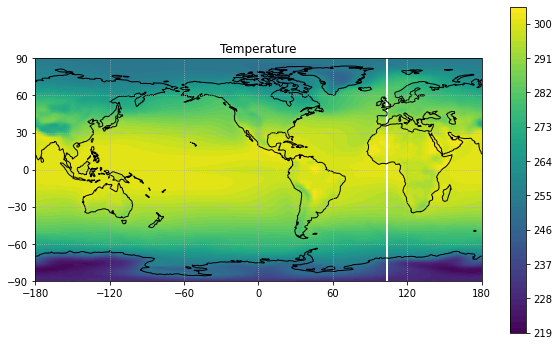

In [129]:
# Code here... don't worry, it's basically written above -- you can do this!

startday= "2006-01-01"
endday= "2016-12-31"
early=DS.sel(time=slice(startday,endday))

early_avg=early.mean(dim="time") #complete

#Projection for plot
projection= ccrs.PlateCarree(central_longitude=255);
# Data projection
data_crs = ccrs.PlateCarree()

# Open figure object
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

# Make a contour plot
lon=early_avg["lon"]
lat=early_avg["lat"]
data= early_avg["tas"]
cf=ax.contourf(lon, lat, data, levels=60, transform=data_crs, cbar_kwargs={'label': DS.tas.units})
plt.colorbar(cf)
ax.set_label(DS.tas.units)

# Add the gridlines, title, colorbar
ax.set_xticks([-180,-120,-60,0, 60, 120, 180], crs= projection)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs= projection)
ax.gridlines(crs=projection,linestyle="dotted")
plt.title("Temperature")

#Save our figure, show our figure! (Must save before showing)
plt.savefig('assignment2a_early.png')
plt.show()

## End code

(b) A map of average temperature from 2089-2099

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/geoaxes.py:1586: UserWarning: The following kwargs were not used by contour: 'cbar_kwargs'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


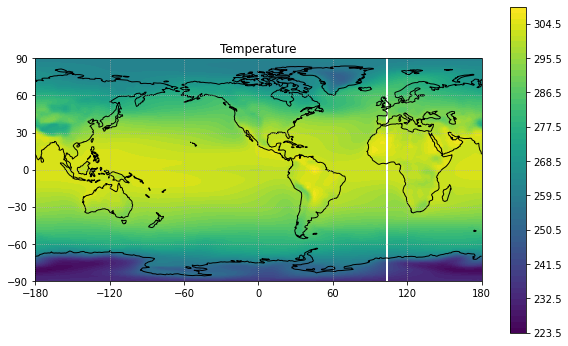

In [130]:
startday= "2089-01-01"
endday= "2099-12-31"
late=DS.sel(time=slice(startday,endday))

late_avg=late.mean(dim="time") #complete

#Projection for plot
projection= ccrs.PlateCarree(central_longitude=255);
# Data projection
data_crs = ccrs.PlateCarree()

# Open figure object
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

# Make a contour plot
lon=late_avg["lon"]
lat=late_avg["lat"]
data= late_avg["tas"]
cf=ax.contourf(lon, lat, data, levels=60, transform=data_crs, cbar_kwargs={'label': DS.tas.units})
plt.colorbar(cf)
ax.set_label(DS.tas.units)

# Add the gridlines, title, colorbar
ax.set_xticks([-180,-120,-60,0, 60, 120, 180], crs= projection)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs= projection)
ax.gridlines(crs=projection,linestyle="dotted")
plt.title("Temperature")

#Save our figure, show our figure! (Must save before showing)
plt.savefig('assignment2a_early.png')
plt.show()

(c) The difference between the temperatures in (a) and (b)

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/geoaxes.py:1586: UserWarning: The following kwargs were not used by contour: 'cbar_kwargs'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


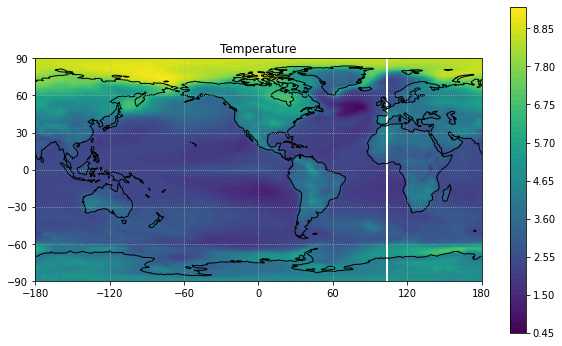

In [131]:
#Projection for plot
projection= ccrs.PlateCarree(central_longitude=255);
# Data projection
data_crs = ccrs.PlateCarree()

# Open figure object
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

# Make a contour plot
lon=late_avg["lon"]
lat=late_avg["lat"]
data= late_avg["tas"] - early_avg["tas"]
cf=ax.contourf(lon, lat, data, levels=60, transform=data_crs, cbar_kwargs={'label': DS.tas.units})
plt.colorbar(cf)
ax.set_label(DS.tas.units)

# Add the gridlines, title, colorbar
ax.set_xticks([-180,-120,-60,0, 60, 120, 180], crs= projection)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs= projection)
ax.gridlines(crs=projection,linestyle="dotted")
plt.title("Temperature")

#Save our figure, show our figure! (Must save before showing)
plt.savefig('assignment2a_early.png')
plt.show()

# Time series plot

Now we can see how the temperature changes from 2006-2099. In this next plot we'll look at making the global average monthly temperatures from 2006-2099 (an x-y plot). 

In [132]:
# This will help you later....
def weighted_mean(data_da, dim, weights):
    r"""Computes the weighted mean.

    We can only do the actual weighted mean over the dimensions that
    ``data_da`` and ``weights`` share, so for dimensions in ``dim`` that aren't
    included in ``weights`` we must take the unweighted mean.

    This functions skips NaNs, i.e. Data points that are NaN have corresponding
    NaN weights.

    Args:
        data_da (xarray.DataArray):
            Data to compute a weighted mean for.
        dim (str | list[str]):
            dimension(s) of the dataarray to reduce over
        weights (xarray.DataArray):
            a 1-D dataarray the same length as the weighted dim, with dimension
            name equal to that of the weighted dim. Must be nonnegative.
    Returns:
        (xarray.DataArray):
            The mean over the given dimension. So it will contain all
            dimensions of the input that are not in ``dim``.
    Raises:
        (IndexError):
            If ``weights.dims`` is not a subset of ``dim``.
        (ValueError):
            If ``weights`` has values that are negative or infinite.
    """
    if isinstance(dim, str):
        dim = [dim]
    else:
        dim = list(dim)

    if not set(weights.dims) <= set(dim):
        dim_err_msg = (
            "`weights.dims` must be a subset of `dim`. {} are dimensions in "
            "`weights`, but not in `dim`."
        ).format(set(weights.dims) - set(dim))
        raise IndexError(dim_err_msg)
    else:
        pass  # `weights.dims` is a subset of `dim`

    if (weights < 0).any() or xr.ufuncs.isinf(weights).any():
        negative_weight_err_msg = "Weight must be nonnegative and finite"
        raise ValueError(negative_weight_err_msg)
    else:
        pass  # `weights` are nonnegative

    weight_dims = [
        weight_dim for weight_dim in dim if weight_dim in weights.dims
    ]

    if np.isnan(data_da).any():
        expanded_weights, _ = xr.broadcast(weights, data_da)
        weights_with_nans = expanded_weights.where(~np.isnan(data_da))
    else:
        weights_with_nans = weights

    mean_da = ((data_da * weights_with_nans).sum(weight_dims, skipna=True)
               / weights_with_nans.sum(weight_dims))
    other_dims = list(set(dim) - set(weight_dims))
    return mean_da.mean(other_dims, skipna=True)

1. Pull time period of interest

In [133]:
data_2006_2099=DS.sel(time=slice('2006-01-01','2099-12-31')) # 94 years
print(data_2006_2099)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 144, time: 1128)
Coordinates:
  * time       (time) object 2006-01-16 12:00:00 ... 2099-12-16 12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 -90.0 -89.05 -89.05 ... 89.05 89.05 90.0
    lon_bnds   (lon, bnds) float64 -1.25 1.25 1.25 3.75 ... 356.2 356.2 358.8
    tas        (time, lat, lon) float32 ...
Attributes: (12/36)
    institution:                  NSF/DOE NCAR (National Center for Atmospher...
    institute_id:                 NSF-DOE-NCAR
    experiment_id:                rcp85
    source:                       CESM1-WACCM
    model_id:                     CESM1-WACCM
    forcing:                      Sl GHG SS Ds SA BC MD OC Oz AA
    ...                 

2. Assign contents into variables

In [134]:
lat = data_2006_2099["lat"]
lon = data_2006_2099["lon"]
tas = data_2006_2099["tas"]

3. Calculate the weights according to latitude. There are multiple ways to do this (see here). In this example, we use the cosine of latitudes. Now we use the function defined above to calculate the weighted mean over the latitude, passing the correct parameters

In [135]:
rad  = 4.*math.atan(1.)/180.
weights   = np.cos(lat*rad)
wmean_lat = weighted_mean(tas, dim='lat', weights=weights) #complete

print(wmean_lat)

<xarray.DataArray (time: 1128, lon: 144)>
array([[288.58334015, 288.52194475, 288.2305642 , ..., 288.72709098,
        288.51379868, 288.46270944],
       [289.17533794, 288.97753828, 288.568459  , ..., 289.4413827 ,
        289.31349218, 289.19579446],
       [289.60567602, 289.5263745 , 289.25587885, ..., 289.71763579,
        289.59630274, 289.55712474],
       ...,
       [291.96953974, 291.91249702, 291.65724916, ..., 292.27606681,
        292.01722585, 291.90748053],
       [290.92120914, 290.79233346, 290.4812486 , ..., 291.32481558,
        291.0473993 , 290.85806079],
       [290.01508237, 290.08411026, 289.96722727, ..., 290.59621021,
        290.20590001, 289.93097754]])
Coordinates:
  * time     (time) object 2006-01-16 12:00:00 ... 2099-12-16 12:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height   float64 2.0


4. Since we want a single average value for the year, we also average over the longitudes. This time it does not have to be weighted.

In [136]:
wmean = wmean_lat.mean(dim='lon')
print(wmean)

<xarray.DataArray (time: 1128)>
array([286.28115254, 286.52558485, 287.09676101, ..., 291.13175468,
       290.04780621, 289.38033779])
Coordinates:
  * time     (time) object 2006-01-16 12:00:00 ... 2099-12-16 12:00:00
    height   float64 2.0


5. Plot time and data from wmean

Text(0.0, 1.0, 'Global Monthly Mean Temperatures')

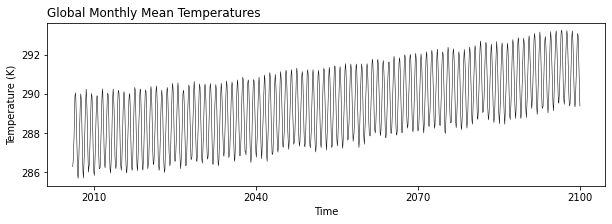

In [137]:
plt.figure(figsize=(10,3))
plt.plot(wmean["time"], wmean, linestyle='-', color='black', linewidth=0.5) #complete
plt.xlabel('Time')
plt.ylabel('Temperature (K)')
plt.title('Global Monthly Mean Temperatures', loc='left')

6. Yay! Another plot. Again -- what is happening? Any observations? What's weird about this plot?

# Time series plot of temperature anomolies

The annual temperature has all of the seasonal cyclicity ... while it's clear the temperature is rising, we can remove the seasonal signal by subtracting a baseline. We can call 2006-2030 temperatures a baseline.

1. Get the annual temperatures and the baseline

In [138]:
annual_wmean = wmean.groupby('time.year').mean(dim='time')

baseline = wmean.sel(time=slice('2006-01-01','2035-12-31')).mean(dim='time')

2. We then subtract the baseline from the annual weighted mean, to get the anomaly

In [139]:
anomaly = annual_wmean - baseline

3. Now plot the anomoly like you did above!

Text(0.0, 1.0, 'Global Monthly Mean Temperatures')

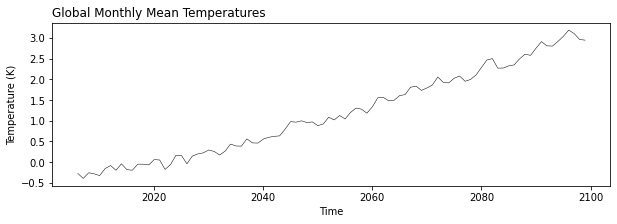

In [140]:
plt.figure(figsize=(10,3))
plt.plot(anomaly["year"], anomaly, linestyle='-', color='black', linewidth=0.5) #complete
plt.xlabel('Time')
plt.ylabel('Temperature (K)')
plt.title('Global Monthly Mean Temperatures', loc='left')

Now we have global average temperature anomolies. Is it what you expected? Is this climate change? 


# BONUS
If you've made it all the way here and still want more to do ...
Plot the global temperature anomoly as a map! This is a combination of the past 3 plots put all together... Good luck.

In [141]:
annual_mean = data_2006_2099.groupby("time.year").mean(dim="time")

baseline = data_2006_2099.sel(time=slice('2006-01-01','2035-12-31')).mean(dim="time")

anomaly = annual_mean - baseline

year = '2096'
anomaly_year = anomaly.sel(year=slice(year,year)).mean(dim="year")

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/geoaxes.py:1586: UserWarning: The following kwargs were not used by contour: 'cbar_kwargs'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


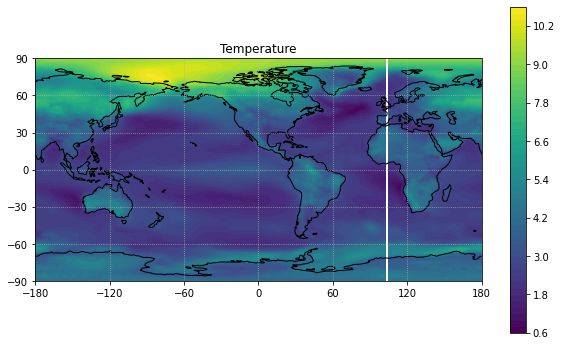

In [142]:
# Open figure object
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

# Make a contour plot
lon=anomaly_year["lon"]
lat=anomaly_year["lat"]
data= anomaly_year["tas"]
cf=ax.contourf(lon, lat, data, levels=60, transform=data_crs, cbar_kwargs={'label': DS.tas.units})
plt.colorbar(cf)
ax.set_label(DS.tas.units)

# Add the gridlines, title, colorbar
ax.set_xticks([-180,-120,-60,0, 60, 120, 180], crs= projection)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs= projection)
ax.gridlines(crs=projection,linestyle="dotted")
plt.title("Temperature")

#Save our figure, show our figure! (Must save before showing)
plt.savefig('assignment2a_early.png')
plt.show()